# PROYECTO 2 #
# Ingeniería de features, Modelos avanzados e Interpretación de modelos
## PROYECTO: Análisis de mercado inmobiliario ##
### PROBLEMA ###  
Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.
### RESUMEN DEL PROYECTO ###
Aplica transformación de datos y entrena Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning. ¿Qué puedes aprender del problema que estás abordando mediante el estudio de tu propio modelo?
### CONSIGNA ###
En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?
### PARTE A - Transformación de Datos ###

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

1. Detección y eliminación de Outliers

2. Encoding

3. Imputación de valores faltantes

4. Escalado de datos

5. Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

### Análisis Exploratorio de Datos

1. __Se importan las librerías__ necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2. __Se realiza la carga el dataset__ usando las funcionalidades de Pandas.

In [2]:
properati = pd.read_csv('Data\DS_Proyecto_01_Datos_Properati.csv')

In [3]:
properati.shape # Filas y columnas

(146660, 19)

* *El DataSet, cuenta con **146.660 Filas**, y **19 Columnas**.*

In [4]:
properati.head(3) # Primeras 3 instancias (filas)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


3. __Valores Faltantes:__ se imprimen en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna. En un principio es a mera exposición, ya que por el momento no vamos a descartar ninguno de ellos,ni realizar imputación de datos.

In [5]:
properati.isnull().sum() # Nombres de las columnas y su cantidad de faltantes

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

* *Variables con elementos faltantes:*  
    *1. `Superficie Cubierta` **15%** (21.614);*  
    *2. `Superficie Total` **14%** (20.527);*  
    *3. Latitud y Longitud 7% c/u (10.000 c/u);*  
    *4. Baños 4% (6.000).*

4. __Tipos de propiedad:__ Se explora cuántos tipos de propiedad hay publicados en el dataset y la cantidad de instancias por cada tipo de propiedad.

In [6]:
pd.unique(properati['property_type'])

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [7]:
print(properati['property_type'].value_counts())

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


* *En el Dataset de Properati se encuentran publicados __10 Tipos de Propiedad__ en la zona geográfica analizada.*  
* *Se destacan:*  
    *1. `Departamentos` con 107.326 unidades __(73%)__;*  
    *2. `Casas` con 21.521 (15%);*  
    *3. `PH` con 14.298 instancias (10%).*

Text(0.5, 1.0, 'Número de Publicaciones por Tipo de Propiedad')

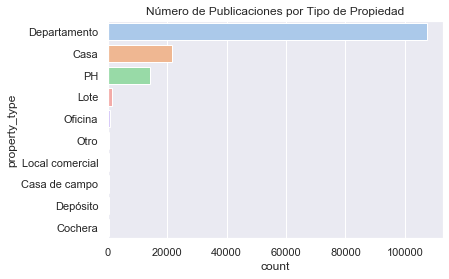

In [8]:
sns.countplot(data = properati, y = 'property_type', order = properati['property_type'].value_counts().index, palette='pastel')
plt.title('Número de Publicaciones por Tipo de Propiedad')

5. __Se visualizan las regiones__ a las cuales pertenecen las publicaciones.

Text(0.5, 1.0, 'Número de Publicaciones por Barrio/Partido de la Provincia de Bs. As')

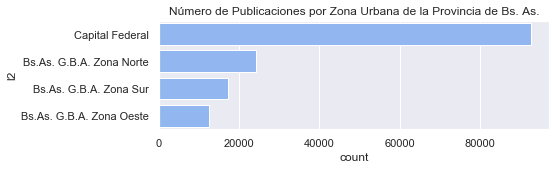

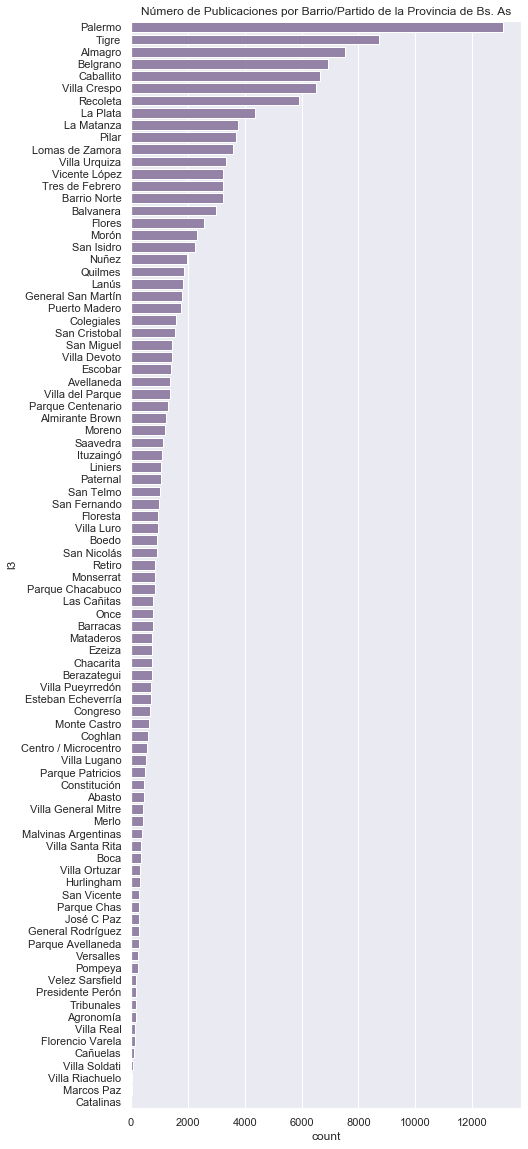

In [9]:
f, ax = plt.subplots(figsize = (7,2))
sns.countplot(y = 'l2', data = properati, order = properati['l2'].value_counts().index, color = '#82B3FF')
plt.title('Número de Publicaciones por Zona Urbana de la Provincia de Bs. As.')

f, ax = plt.subplots(figsize = (7,20))
sns.countplot(y = 'l3', data = properati, order = properati['l3'].value_counts().index, color = '#957dad')
plt.title('Número de Publicaciones por Barrio/Partido de la Provincia de Bs. As')

In [10]:
print(properati['l2'].value_counts())

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


In [11]:
print(properati['l3'].value_counts())

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64


* *Las publicaciones son principalmente de `Capital Federal` **(63%)**.*  
* *Dentro de CABA, se detaca el barrio de `Palermo` (**14%** s/ CABA), seguido por Almagro, Belgrano, Caballito, Villa Crespo y Recoleta.*  
* *Dentro de AMBA, el partido de `Tigre` es el que presenta mayor número de publicaciones.*

6. __Filtrando el Dataset:__ Para un primer Análisis Exploratorio, se realizará lo siguiente:
* Nos centramos en los tipos de propiedad con mayor concentración, `Departamentos, Casas y PH` y en la región con mayor número de publicaciones, es decir, `Capital Federal`.
* A su vez, se procederá a filtrar aquellas instancias en las que la `Superficie Cubierta` sea superior a la `Superficie Total`, ya que en la práctica NO es posible que ésto suceda.

In [12]:
properati_2 = properati [(properati['l2'] == 'Capital Federal') & ((properati['property_type'] == 'Departamento') | (properati['property_type'] == 'PH') | (properati['property_type'] == 'Casa'))]

In [13]:
properati_2.shape

(91485, 19)

* *En el nuevo Dataframe, **la muestra se redujo en un 38%**.*

### Detección y eliminación de Outliers

1. __Se exponen las Estadísticas Descriptivas__, como ser la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los NaN valores.

In [14]:
pd.set_option('precision', 2) # Para una mejor visualización, se redujeron los decimales a 2

In [15]:
properati_2[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.00,91485.00,89314.00,82568.00,82250.00,9.15e+04
mean,2.96,1.96,1.56,112.63,94.97,2.60e+05
std,1.31,1.07,0.86,980.71,778.52,3.22e+05
min,1.00,0.00,1.00,10.00,1.00,6.00e+03
25%,2.00,1.00,1.00,49.00,44.00,1.20e+05
50%,3.00,2.00,1.00,71.00,63.00,1.75e+05
75%,4.00,3.00,2.00,111.00,96.00,2.79e+05
max,26.00,15.00,14.00,126062.00,126062.00,3.24e+07


* *Tanto en `Superficie Total` como `Superficie Cubierta`, los valores mínimos y máximos obtenidos resultan poco razonables para dichas instancias, ya que como se observa, oscilan entre 10m2 - 126.062m2 y 1m2 - 126.062m2 respectivamente, siendo metrajes inviables para Dptos., Casas o PH. Al respecto, se observa una `Desviación Estándar Alta`, lo cual indica que los datos se extienden sobre un amplio rango de valores.*
* *Si bien a primera vista `Bedrooms = 0` podría parecer ilógico, no lo es, ya que se trataría de `Monoambientes`, donde se comparten en un mismo ambiente, living, cocina y dormitorio.*
* *La desviación estándar de `Precios` parece razonable, aunque los mínimos y máximos distan mucho de la media.*

2. __Detección de Outliers__ en `Precio` y `Superficie Total` a través de Boxplots.

Text(0.5, 1.0, 'Precio en Dólares por Tipo de Propiedad')

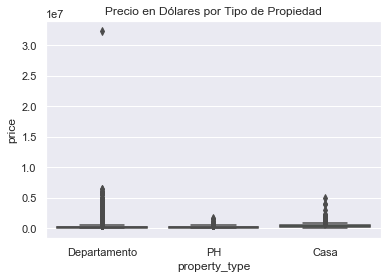

In [16]:
sns.boxplot(data = properati_2, x = 'property_type', y = 'price')
plt.title('Precio en Dólares por Tipo de Propiedad')

Text(0.5, 1.0, 'Superficie Total por Tipo de Propiedad')

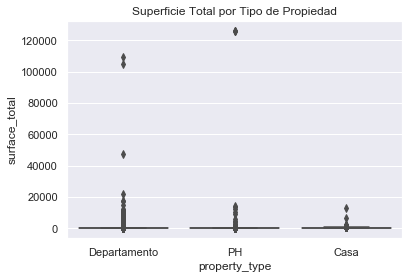

In [17]:
sns.boxplot(data = properati_2, x = 'property_type', y = 'surface_total')
plt.title('Superficie Total por Tipo de Propiedad')

* *Tanto en Departamentos como PH, se observan en `Superficie`, valores muy por encima de la media, así como muy bajos (incluso nulos).*
* *En `Precios` también se visualizan outliers en Departamentos.*
* *A su vez, es probable que exista una correlación positiva entre superficie y precio de los inmuebles, por la similitud de la distribuciónde sus datos.*

3. __Eliminación de Outliers__: se procede a descartar los datos atípicos para cada tipo de propiedad.
* Se aplicarán filtros al Dataset, a partir de un **IQR Score**.
* En su revisión, se verificará que se cumpla que la `Superficie Total Mínima` sea de 19m2, basándose en el Nuevo Código de Edificación de CABA, que entró en vigencia el 1° de enero de 2019, y hablitó la construcción de microambientes mínimos, de hasta 18 metros cuadrados, sin contar el baño.

In [18]:
Q1 = properati_2.quantile(0.25)
Q3 = properati_2.quantile(0.75)
IQR = Q3 - Q1
print (IQR) # Se visualiza el IQR para cada columna.

lat                     0.03
lon                     0.05
rooms                   2.00
bedrooms                2.00
bathrooms               1.00
surface_total          62.00
surface_covered        52.00
price              159000.00
dtype: float64


In [19]:
properati_3 = properati_2 [~ ((properati_2 <(Q1 - 1.5 * IQR)) | (properati_2> (Q3 + 1.5 * IQR))). any (axis = 1)]
properati_3.shape

(79211, 19)

* *Un **13%** de los datos resultaron ser atípicos, de acuerdo a la metodología utilizada (IQR Score).*

* *A su vez, se procederá a filtrar aquellas instancias en las que la `Superficie Cubierta` sea superior a la `Superficie Total`, ya que en la práctica NO es posible que ésto suceda.*

In [20]:
mask_sup = (properati_3['surface_covered'] <= properati_3['surface_total'])
properati_4 = properati_3[mask_sup]

In [21]:
properati_4 = properati_3[mask_sup]

In [22]:
properati_4.shape

(69989, 19)

* *La muestra se redujo casi un **9%** más.*

* *Finalmente, para lograr un análisis más robusto, se procede a eliminar los Precios Extremos sobre el Dataset que venimos filtrando.*

In [23]:
p5 = np.percentile(properati_4.price, 5)
p95 = np.percentile(properati_4.price, 95)
properati_5 = properati_4[(properati_4.price >= p5) & (properati_4.price <= p95)]
properati_5.shape

(63287, 19)

* *__Finalmente__, el Dataset que se considera adecuado, **representa un 43% del Inicial**.*
* *Si bien puede parecer un porcentaje bajo, son muchos los datos mal cargados (como propiedades -hablamos de Dptos., Casas o PH- con Sup. Total de 10m2 o 126.062m2), o cuyos parámetros distan mucho de la media (como inmuebles con 14 baños).*

* *A continuación se reflejan las **nuevas distribuciones** para las `variables Superficie Total` y `Precio`:*

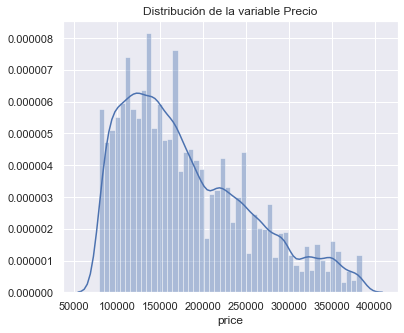

In [24]:
plt.figure(figsize = (6,5))
sns.distplot(properati_5['price'])
plt.title('Distribución de la variable Precio')
plt.ticklabel_format(style = 'plain')

Text(0.5, 1.0, 'Precio en Dólares según Tipo de Propiedad - Filtrado')

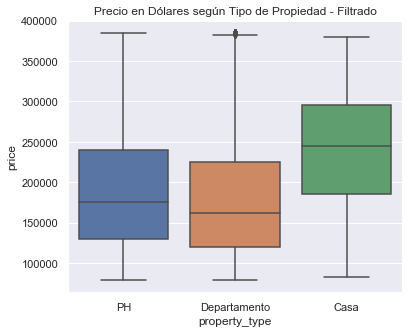

In [25]:
plt.figure(figsize = (6,5))
sns.boxplot(data = properati_5, x = 'property_type', y = 'price')
plt.title('Precio en Dólares según Tipo de Propiedad - Filtrado')

Text(0.5, 1.0, 'Distribución de la variable Superficie Total')

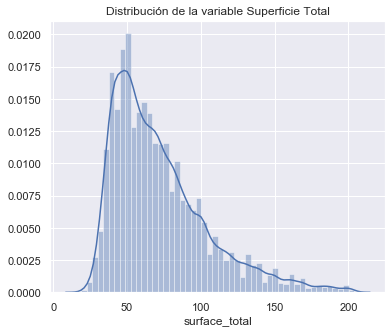

In [26]:
plt.figure(figsize = (6,5))
sns.distplot(properati_5['surface_total']) 
plt.title('Distribución de la variable Superficie Total')

Text(0.5, 1.0, 'Superficie Total según Tipo de Propiedad - Filtrado')

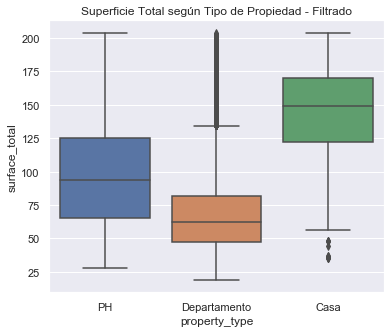

In [27]:
plt.figure(figsize = (6,5))
sns.boxplot(data = properati_5, x = 'property_type', y = 'surface_total')
plt.title('Superficie Total según Tipo de Propiedad - Filtrado')

* *Tanto en el caso de Superficie como de Precios, se visualizan datos más consistentes.*
* *En ambos casos, es clara la distribución de datos con **asimetría positiva (o a la derecha)**, siendo la mayor parte de los precios de las propiedades, menores a U$S 250.000.*

* *Se exponen nuevamente las Estadísticas Descriptivas, con el Dataset Filtrado.*

In [28]:
properati_5[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,63287.00,63287.00,62665.00,63287.00,63287.00,63287.00
mean,2.74,1.79,1.32,72.24,63.44,180901.43
std,0.97,0.83,0.54,32.40,26.47,73268.27
min,1.00,0.00,1.00,19.00,2.00,79000.00
25%,2.00,1.00,1.00,48.00,43.00,123000.00
50%,3.00,2.00,1.00,65.00,57.00,165000.00
75%,3.00,2.00,2.00,88.00,77.00,230000.00
max,7.00,6.00,3.00,204.00,174.00,385000.00


* *Mejora la distribución de los datos, presentando una reducción notable en el desvío estándar de los mismos.*
* *Se verificó el cumplimiento de la `Superficie Total Mínima` de 19m2.*

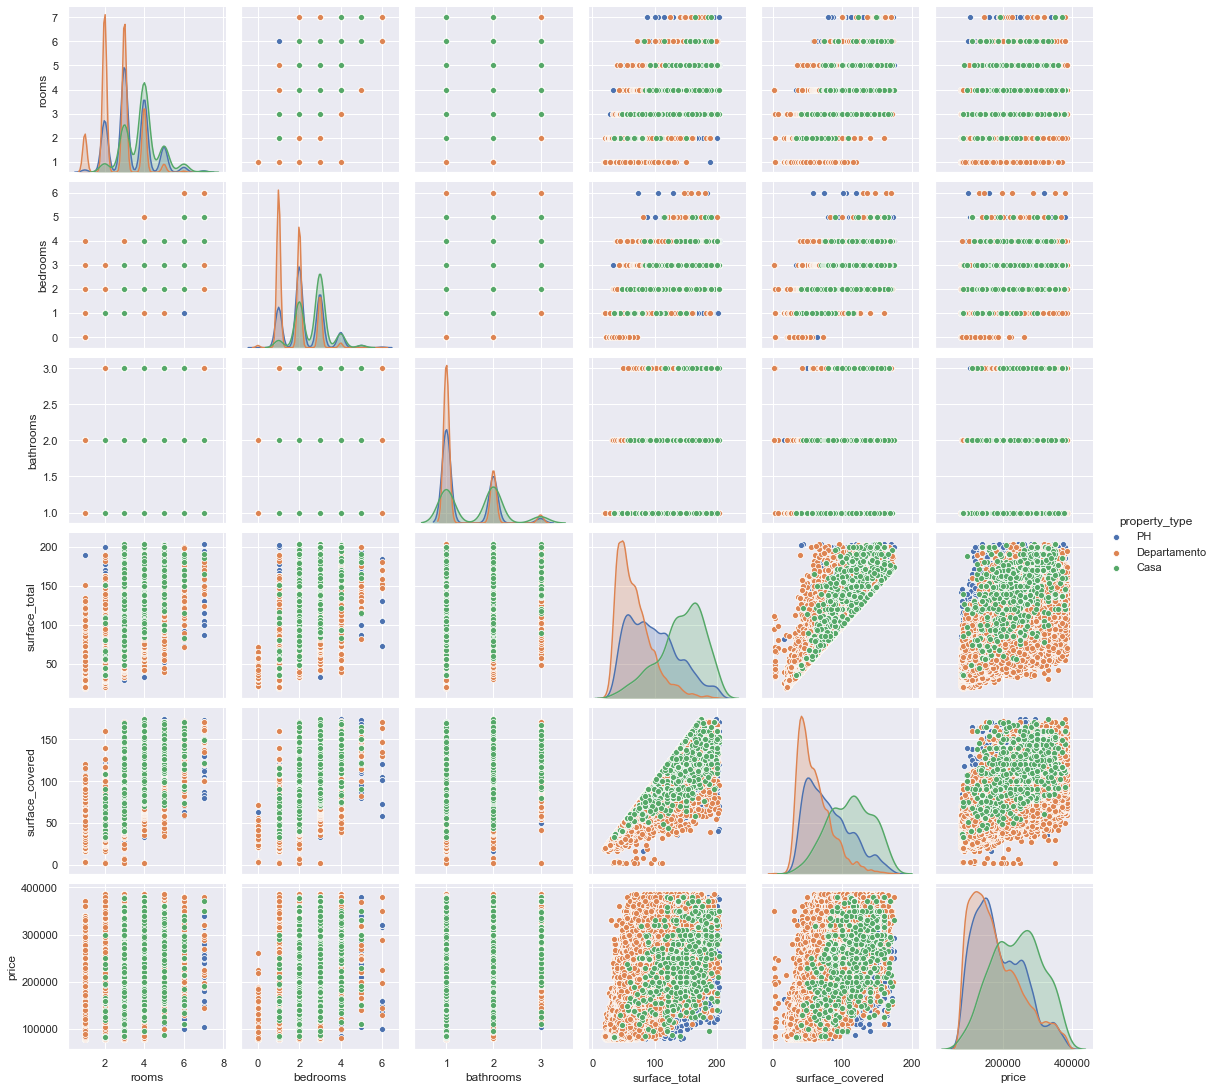

In [29]:
sns.pairplot(data=properati_5, hue= 'property_type', vars=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price'])

* *Podemos inferir que tanto Superficie Total como Superficie Cubierta, están altamente correlacionadas con el Precio, no así el resto de las variables.*

### Imputación de Valores Faltantes

In [30]:
properati_5.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                2828
lon                2828
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms           622
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

* *Variables que aún cuentan con elementos faltantes:*  
    *1. Latitud y Longitud 4% c/u (2.828 c/u);*  
    *2. Baños 1% (622).*

* Nos enfocaremos en la imputación de datos de `Baños`, ya que como se está trabajando con Departamentos, Casas y PH, no es posible que no hayan Baños en dichas propiedades (como sí podría ocurrir en un Depósito).
* Respecto a latitud y longitud, no se realizará ningún cambio, ya que no serán utilizadas en éste estudio para determinar el precio de las propiedades por la complejidad de su análisis.

Text(0.5, 1.0, 'Distribución de la variable Baños')

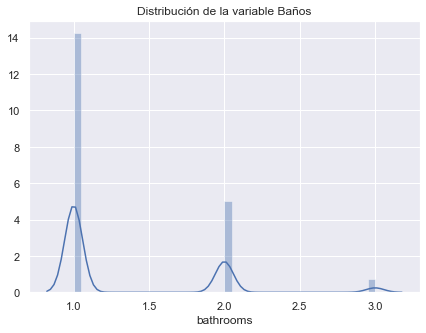

In [31]:
plt.figure(figsize = (7,5))
sns.distplot(properati_5['bathrooms']) 
plt.title('Distribución de la variable Baños')

* La distribución de sus datos es ASIMÉTRICA, y la cantidad de valores nulos representa un porcentaje bajo sobre el total.
* Si bien alguna de las propiedades posee 14 baños, dicho valor atípico no está influyendo en las medidas de tendencia central, ya que la media es de 1.3, la moda de 1.0 y la mediana de 1.0.
* Se procede a imputar los datos faltantes con la `mediana` de los mismos, que a su vez coincide con la `moda`, ya que al hablar de baños lo hacemos en unidades, y no tendría coherencia imputar un valor de 1.3 (media).

In [32]:
median_bathrooms = properati_5['bathrooms'].median()
print(median_bathrooms)

1.0


In [33]:
properati_5['bathrooms'] = properati_5['bathrooms'].fillna(median_bathrooms)

<ipython-input-33-d6fbcf48655a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_5['bathrooms'] = properati_5['bathrooms'].fillna(median_bathrooms)


In [34]:
sum(pd.isnull(properati_5['property_type']))

0

* Todos los valores nulos de `Baños` fueron reemplazados por la moda.

### Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

1. __Correlaciones Pearson:__ Primero se realiza el estudio de las correlaciones entre las variables rooms, bedrooms, bathrooms, surface_total, surface_covered y price, con el fin de exponer la existencia de correlaciones lineales.

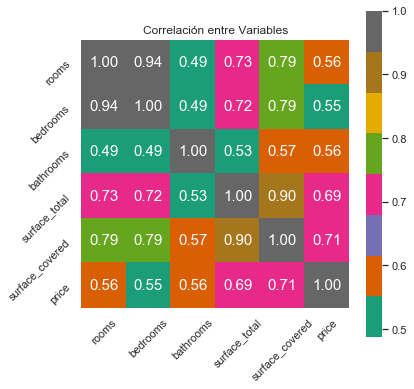

In [35]:
corr = properati_5[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Dark2')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación entre Variables')
plt.show()

* *Se evindencia:*
    * *Correlación Alta **(0.94)**, entre `rooms` (ambientes) y `bedrooms` (Dormitorios).*
    * *Correlación Alta **(0.90)**, entre `surface_covered` (superficie total) y `surface_total` (superficie cubierta).*
    * *Además, `surface_covered` y `surface_total`, tiene Correlación Alta y Moderadamente Alta, con todas las demás variables, excepto `bathrooms`.*
* *Por su parte, `Price` (precio) posee una correlación Moderadamente Alta con `surface_covered` **(0.71)** y `surface_total` **(0.69)**, coincidiendo con lo esperado, respecto a ser las __variables más relevantes para determinar el precio de los inmuebles__.*

2. __Correlaciones Spearman:__ Para adicionar información al estudio, se expone la correlación a través del método Spearman, con el fin de visualizar la existencia de correlaciones No lineales.

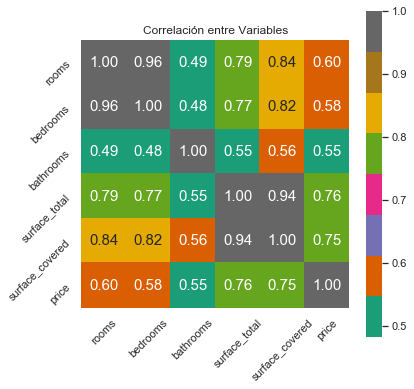

In [36]:
corr = properati_5[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].corr(method='spearman')
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Dark2')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación entre Variables')
plt.show()

* No se observan importantes cambios entre ambos tipos de correlaciones.
* *Se mantienen las Altas correlaciones entre `rooms` (ambientes) y `bedrooms` (Dormitorios), y entre `surface_covered` (superficie total) y `surface_total` (superficie cubierta).*
* `surface_covered` y `surface_total`, incrementan su correlación positiva con`rooms` (ambientes) y `bedrooms`*.
* *Por su parte, `Price` (precio) posee una correlación algo mayor con `surface_covered` **(0.75)** y `surface_total` **(0.76)**..

3. __Aplicación de Reducción de Dimensionalidad - PCA.__

* Se implementa la técnica de PCA, ya que es particularmente útil en el tratamiento de datos donde existen múltiples - colinealidades entre las características / variables como ocurre en el presente estudio.

* Comenzamos con 2 componentes principales, que están altamente correlacionados entre sí y aunque parecen no tener influencia con la etiqueta `y` que queremos predecir.

In [37]:
X = properati_5[['rooms','bedrooms']]
y = properati_5[['price']]

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_nuevo = pca.fit_transform(X) 

In [39]:
pca.components_

array([[ 0.76371545,  0.64555303],
       [-0.64555303,  0.76371545]])

Text(0, 0.5, 'X_nuevo[:,1]')

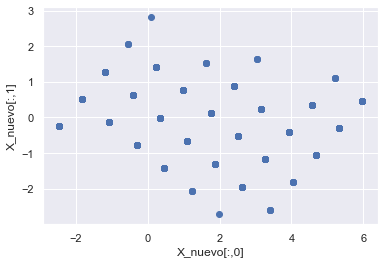

In [40]:
plt.scatter(X_nuevo[:,0], X_nuevo[:,1])
plt.xlabel('X_nuevo[:,0]')
plt.ylabel('X_nuevo[:,1]')

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.tree import DecisionTreeRegressor

regresor = DecisionTreeRegressor(max_depth=1)
regresor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [43]:
y_train_pred = regresor.predict(X_train)
y_test_pred = regresor.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

3964370595.1349235
3993147711.3009844


In [45]:
regresor.feature_importances_

array([1., 0.])

### PARTE 3 - Primer Modelo de Machine Learning

* __Elegir una métrica apropiada para evaluar los resultados de los modelos.__

* *La métrica considerada como adecuada para evaluar el resultado de los modelos, es la de `Regresión`, la cual es un algoritmo de aprendizaje supervisado, que consiste en aprender __etiquetas numéricas contínuas__ y a partir de un conjunto de atributos/features X (en éste caso dos) tomando como muestra un conjunto de instancias.*

* __Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`).__

* *Como indicaba la consiga inicial, lo que se busca predecir es el `Precio` de las propiedades, la cual será nuestra `variable y`.*
* *Las variables predictoras, fueron elegidas de acuerdo a su correlación con el Precio, al análisis previo realizado sobre el sector inmobiliario y a su disponibilidad, ya que hay sólo 5 para seleccionar: `rooms` y `surface total`.*

In [46]:
X = properati_ml_5[['rooms','surface_total']]
y = properati_ml_5[['price']]

* __Realizar un Train/Test split de los datos.__

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(57661, 2) (57661, 1) (24712, 2) (24712, 1)


* __Generar un modelo benchmark y evaluarlo.__

* *Se tomará como referencia un modelo de `Regresión Lineal` y se tratará de predecir el Precio de las propiedades a partir del mismo.* 

In [48]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [49]:
linear_model.fit(X_train, y_train) # Se entrena el modelo
print(linear_model.coef_, linear_model.intercept_) # Pendiente y ordenada al origen

[[-8797.40709848  2733.19382227]] [28242.5833674]


* *Se realiza la evaluación del modelo.*
* *Se realiza el `histograma de los errores` ( y−y_predicho ) para cada conjunto y el `gráfico de dispersión` de  y  vs  y_predicho  para el conjunto de test.*

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 213500.16708139662
Raíz del error cuadrático medio en Test: 223733.9015781214


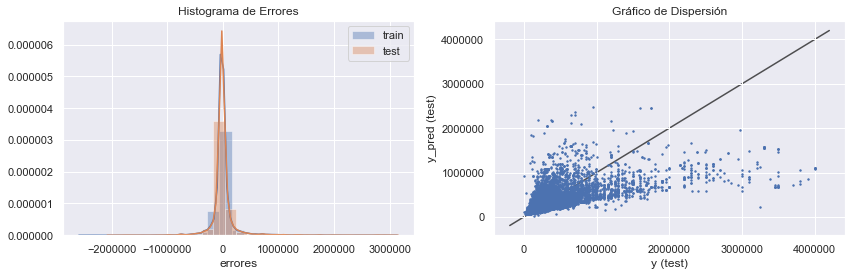

In [50]:
from sklearn.metrics import mean_squared_error
modelo = ['Regresión lineal']

for i, model in enumerate([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 25, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 25, label = 'test')
    plt.xlabel('errores')
    plt.title('Histograma de Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title('Gráfico de Dispersión')
    
    plt.tight_layout()
    plt.show()

* *Si bien los histogramas de los errores parecieran ser algo simétricos, no se observan parecidos entre ambos conjuntos, siendo un indicador de que **no** nos estamos aproximando a nuestros datos de manera correcta.*
* *En el gráfico, **y**  vs  **y predicho**  para el conjunto de test, los puntos se van alejando de la diagonal, y el error, parece ser cada vez mayor.*
* *En éste caso, la regresión lineal no estaría haciendo un buen trabajo en reproducir la curva teórica.*

* __Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.__

* *Se seleccionan las mismas variables predictoras que en el punto anterior (rooms y surface total), dado que si tendemos a agregar más característivas que no proporcionan ninguna cantidad significativa de información nueva, el rendimiento del modelo se deteriorará después de un tiempo.*

* *Se importan y crean los modelos de regresión de árboles de decisión y vecinos más cercanos.*

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=10)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

* *Se entrenan los modelos.*

In [52]:
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

* __Evaluar los modelos obtenidos.__

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 201748.9117174221
Raíz del error cuadrático medio en Test: 212123.36104132212


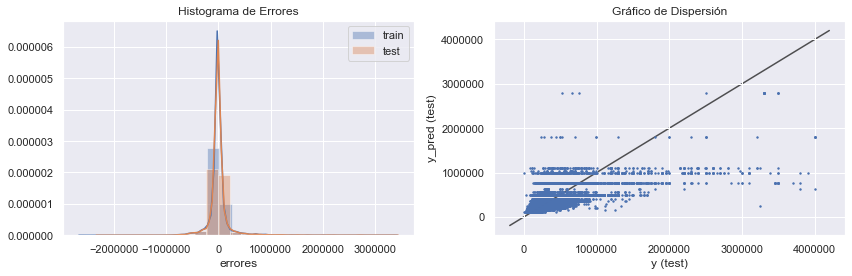

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 172814.48606675648
Raíz del error cuadrático medio en Test: 202376.79873879236


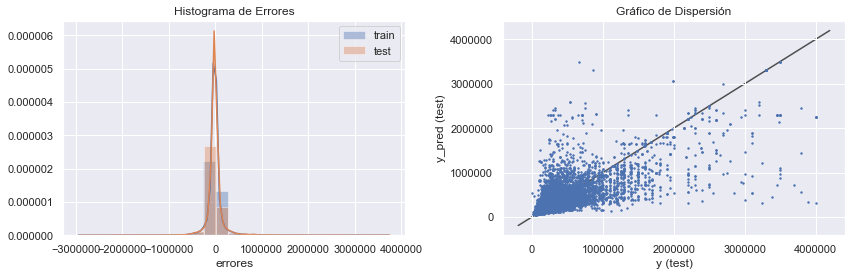

In [53]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train).reshape(57661,1)
    y_test_pred = model.predict(X_test).reshape(24712,1)
        
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 25, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 25, label = 'test')
    plt.xlabel('errores')
    plt.title('Histograma de Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title('Gráfico de Dispersión')
    
    plt.tight_layout()
    plt.show()

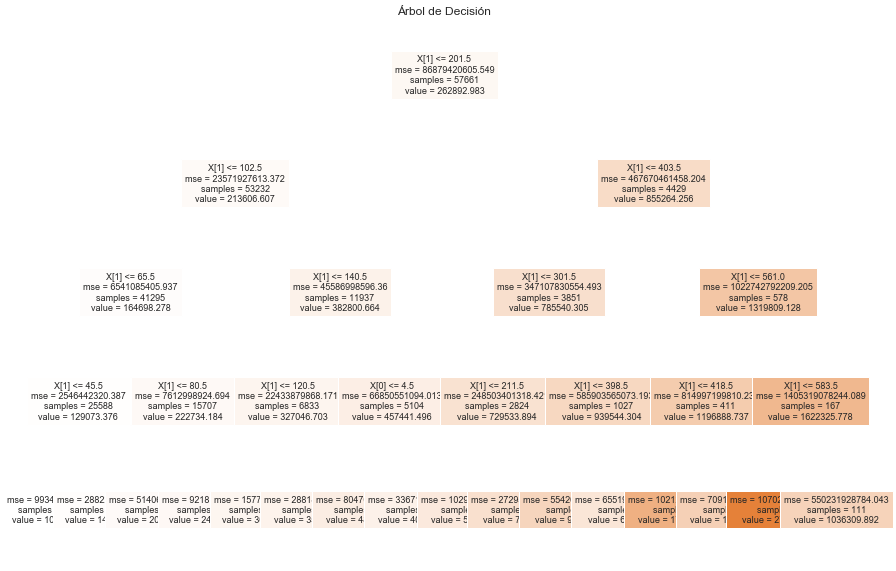

In [54]:
from sklearn import tree

if tree_regressor.max_depth < 5:
    plt.figure(figsize = (15,10))
    tree.plot_tree(tree_regressor, filled = True, fontsize = 9)
    plt.title('Árbol de Decisión')
    plt.show()

* *Tanto con Árboles de Decisión como en K Vecinos, los histogramas de los errores no parecen ser simétricos ni parecidos para ambos conjuntos, siendo un indicador de que **no** nos estamos aproximando a nuestros datos de manera correcta.*
* *En los gráficos, **y**  vs  **y predicho**  para el conjunto de test, los puntos se encuentran cada vez más dispersos, y el error, es ser cada vez mayor.*
* *Los errores RMSE, tienen valores muy altos, por lo que aún no se está logrando una buena predicción de los valores.*

* __Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.__

* *Se confeccionan `Curvas de Validación`, para evaluar los modelos y encontrar los valores de **k** y **max_deph** (hiperparámetros) que den una mayor precisión.*

In [55]:
# Definir las listas vacias para los valores de accuracy deseados
lista_rmse_train_knn = []
lista_rmse_test_knn = []

# Definir la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generar un loop sobre los distintos valores de k 
for k in k_vecinos:

    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn_regressor.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train_knn.append(rmse_train)
    lista_rmse_test_knn.append(rmse_test)

Text(0.5, 1.0, 'Curva de Validación - K Vecinos')

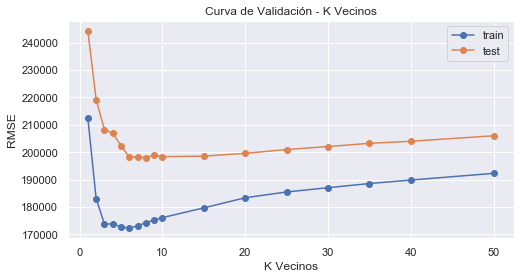

In [56]:
plt.figure(figsize = (8,4))
plt.plot(k_vecinos, lista_rmse_train_knn,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test_knn,'o-',label='test')
plt.legend()
plt.xlabel("K Vecinos")
plt.ylabel("RMSE")
plt.title('Curva de Validación - K Vecinos')

In [57]:
print("K vecinos con mínimo RMSE para train:",k_vecinos[lista_rmse_train_knn.index(min(lista_rmse_train_knn))],"con un valor de",lista_rmse_train_knn[lista_rmse_train_knn.index(min(lista_rmse_train_knn))])

print("K vecinos con mínimo RMSE para test:",k_vecinos[lista_rmse_test_knn.index(min(lista_rmse_test_knn))],"con un valor de",lista_rmse_test_knn[lista_rmse_test_knn.index(min(lista_rmse_test_knn))])

K vecinos con mínimo RMSE para train: 6 con un valor de 172178.06972103842
K vecinos con mínimo RMSE para test: 8 con un valor de 197995.11044920204


In [58]:
lista_rmse_train_dt = []
lista_rmse_test_dt = []

max_depths = [1,2,3,4,5,6,7,8,9,10,20,25,30,40,50,80]

for max_depth in max_depths:

    # Definir el modelo con la profundidad deseada
    tree_regressor = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = tree_regressor.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train_dt.append(rmse_train)
    lista_rmse_test_dt.append(rmse_test)

Text(0.5, 1.0, 'Curva de Validación - Árbol de Decisión')

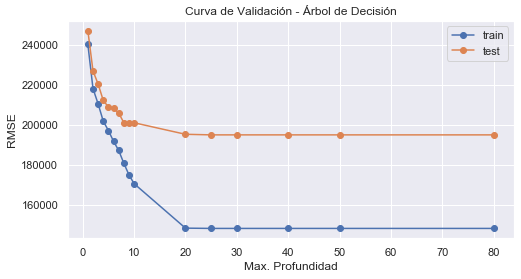

In [59]:
plt.figure(figsize = (8,4))
plt.plot(max_depths, lista_rmse_train_dt,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test_dt,'o-',label='test')
plt.legend()
plt.xlabel("Max. Profundidad")
plt.ylabel("RMSE")
plt.title('Curva de Validación - Árbol de Decisión')

In [60]:
print("Profundidad con mínimo RMSE para train:",max_depths[lista_rmse_train_dt.index(min(lista_rmse_train_dt))],"con un valor de",lista_rmse_train_dt[lista_rmse_train_dt.index(min(lista_rmse_train_dt))])

print("Profundidad con mínimo RMSE para test:",max_depths[lista_rmse_test_dt.index(min(lista_rmse_test_dt))],"con un valor de",lista_rmse_test_dt[lista_rmse_test_dt.index(min(lista_rmse_test_dt))])

Profundidad con mínimo RMSE para train: 25 con un valor de 148049.7916436316
Profundidad con mínimo RMSE para test: 25 con un valor de 194904.6848451268


* *Optimizamos el número de vecinos y la profundidad del árbol, en función a los valores obtenidos a partir de las Curvas de Validación realizadas.*

In [61]:
tree_regressor = DecisionTreeRegressor(max_depth=25, random_state=10)
knn_regressor = KNeighborsRegressor(n_neighbors=8)

In [62]:
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 148049.7916436316
Raíz del error cuadrático medio en Test: 195382.03411797376


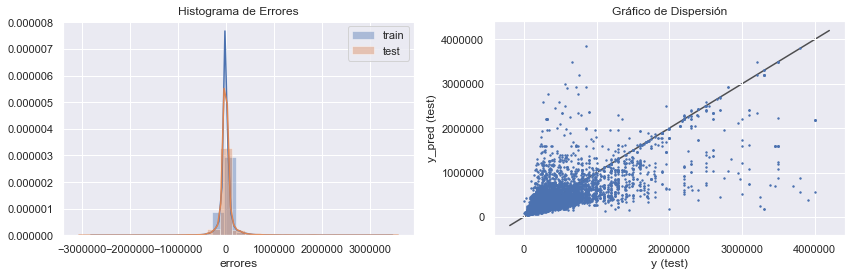

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 174201.21034154753
Raíz del error cuadrático medio en Test: 197995.11044920204


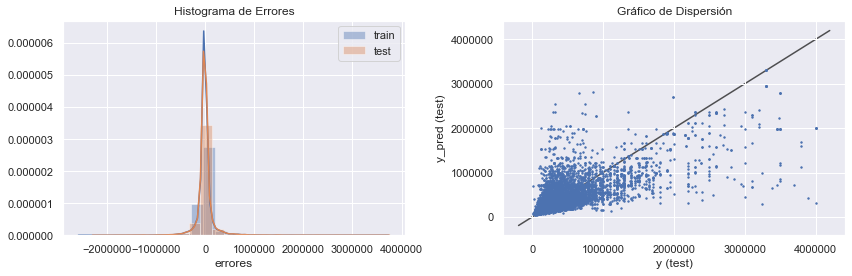

In [63]:
# modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train).reshape(57661,1)
    y_test_pred = model.predict(X_test).reshape(24712,1)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 25, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 25, label = 'test')
    plt.xlabel('errores')
    plt.title('Histograma de Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title('Gráfico de Dispersión')
    
    plt.tight_layout()
    plt.show()

* *Es real que la precisión de los modelos aumentó y su desempeño mejoró tras el cambio en los valores de los hiperparámetros, y el que mejor lo hizo fue el modelo de Árboles de Decisión*.

* *Es por ello, que entre los modelos entrenados, elegiría el de `Árboles de Decisión`, porque el histograma de error parece ser más simétrico y el error RMSE es menor, tanto para train como para test.*

* __Ser crítico/a con la metodología utilizada.__

* *Igualmente, si bien para ambos casos los errores RMSE se redujeron, siguen teniendo valores muy altos.*
* *Ésto ocurre, porque los errores RMSE, son sensibles a valores atípicos, y en nuestra muestra tenemos varios, ya que no se realizaron la cantidad de filtros necesarios en los datos, para poder reducir los Outliers lo máximo posible*.
* *Además, el Dataset filtrado que consideramos para éste punto, no incluye variables de importancia como `Barrios`, por lo que no fue posible incluírlo como variable predictora, a pesar de su influencia en los precios de las propiedades.*
* *Por ello, es necesario eliminar dichos Outliers antes del Train Test Split y evaluar nuevamente los modelos con la muestra filtrada.*

### PARTE B - Modelos Avanzados ###
​
6. Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
​
7. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
​
8. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

### PARTE C - Interpretación de modelos ###

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

9. ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

10. ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

### DESAFÍO OPCIONAL ###

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?